In [1]:
import numpy as np
import matplotlib.pyplot as plt
import paco.processing.fullpaco as f_paco
import paco.processing.paco as p
from paco.util.util import *



In [2]:

fp = f_paco.FullPACO()

Text(0.5, 1.0, '90 deg rotation')

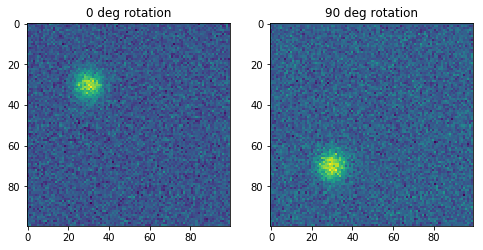

In [3]:
angles = np.array([0, 30, 45, 60, 90])
p0 = (30,30)
sigma = 0.5 # gaussian noise

mean = 0

images = [np.reshape(np.random.normal(mean, sigma, 10000), (100,100)) for j in range(len(angles))]

xx, yy = np.meshgrid(np.arange(-30, 70),np.arange(-30, 70))
s = gaussian2d(xx,yy,4, 5)
images_signal = [i + s for i in images]
rot_images = np.array([rotateImage(images_signal[j], angles[j]) for j in range(len(images_signal))])
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(8,6))
ax[0].imshow(rot_images[0])
ax[0].set_title("0 deg rotation")
ax[1].imshow(rot_images[-1])
ax[1].set_title("90 deg rotation")



Running PACO...
0
Done
(array([nan]), array([nan]))


/home/evert/.local/share/virtualenvs/PACO-L1lsUoAz/lib/python3.7/site-packages/matplotlib/image.py:396: UserWarning: Warning: converting a masked element to nan.
  np.float64(self.norm.vmin))
/home/evert/.local/share/virtualenvs/PACO-L1lsUoAz/lib/python3.7/site-packages/matplotlib/image.py:403: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
/home/evert/.local/share/virtualenvs/PACO-L1lsUoAz/lib/python3.7/site-packages/matplotlib/image.py:408: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
/home/evert/.local/share/virtualenvs/PACO-L1lsUoAz/lib/python3.7/site-packages/matplotlib/colors.py:918: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
/home/evert/.local/share/virtualenvs/PACO-L1lsUoAz/lib/python3.7/site-packages/numpy/ma/core.py:718: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


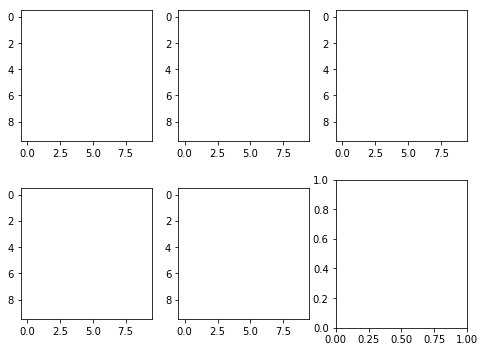

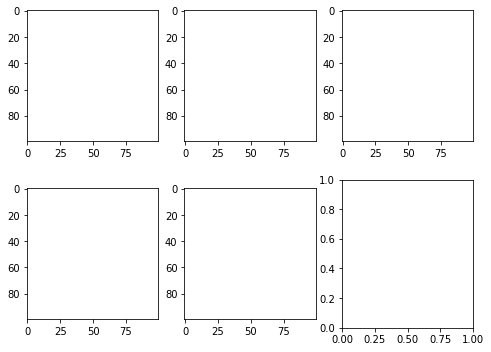

In [4]:
fp.im_stack = rot_images
phi0s = [[50,50]]
img = fp.PACO(phi0s,angles)
print(img)
#plt.imshow(img)
#plt.colorbar()